# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Rayhan Ananda Resky
- Email: rayhanananda2002@gmail.com
- Id Dicoding: rayhanananda

## Menentukan Pertanyaan Bisnis

1.     Bagaimana perbandingan penyewaan antara penyewa yang terdaftar (Registered) dan penyewa yang umum (Casual) pada tiap-tiap bulannya?
2.     Berapa total penyewa sepeda (cnt) pada setiap musimnya (season)?
3.     Seberapa besarkah perbedaan antara penyewaan sepeda di hari kerja dan selain di hari kerja (workingday)?
4.     Bagaimana persebaran dari penyewaan sepeda di setiap jamnya?(hr) Apakah memiliki pengaruh?

## Menyiapkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Syntax di atas merupakan syntax yang saya gunakan untuk memanggil atau menginstall library-library yang saya butuhkan nantinya. Adapun library-library yang saya akan gunakan diantaranya:

1.     pandas. Library ini saya gunakan untuk mengolah data-data dari dataset.
2.     numpy. Library ini saya gunakan ketika saya ingin melakukan perhitungan matematis ataupun melakukan analisis statistik.
3.     matplotlib. Libary ini saya gunakan untuk membuat visualisasi data agar nantinya data yang sudah saya eksplor lebih mudah untuk ditampilkan.
4.     seaborn. Library ini saya gunakan untuk membuat visualisasi data khususnya ketika melakukan analisis statistik.

## Data Wrangling

1.   ***Data Wrangling***


---

Proses pertama dalam Analisis Data yaitu Data Wrangling. Pada proses ini ada 3 hal yang harus dikerjakan, yaitu:

1.     Gathering Data (Pengumpulan Data),
2.     Asessing Data (Pengecekan Data), dan
3.     Cleaning Data (Pembersihan Data).

### Gathering Data

Proses pertama yaitu adalah mengumpulkan data. Untuk melakukan Pengumpulan Data (Gathering Data), berikut adalah syntax yang saya gunakan.

In [ ]:
days_df = pd.read_csv('/content/drive/MyDrive/Materi Dicoding/Submission/day.csv')
hours_df = pd.read_csv('/content/drive/MyDrive/Materi Dicoding/Submission/hour.csv')

### Assessing Data

Setelah proses pengumpulan data (Gathering Data) sudah selesai saya lakukan, maka proses selanjutnya yaitu pengecekan data (Asessing Data). Karena data yang akan kita pakai nantinya pastinya masih merupakan data yang kotor. Oleh karena itu, tujuan dari proses pengecekan data (Asessing Data) ini adalah untuk melihat dan mengecek seberapa kotor data yang akan digunakan. Untuk melakukan hal tersebut, langkah pertama yang saya lakukan yaitu untuk melihat isi dari data tersebut.

In [ ]:
days_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kedua syntax di atas merupakan syntax yang saya gunakan untuk melihat isi dari data tersebut. Apabila dilihat secara kasat mata, data tersebut sudah dapat dibilang bersih, akan tetapi kita tidak boleh mengambil kesimpulan semudah itu hanya karena baru melihat data tersebut secara kasat mata. Oleh karena itu, kita harus melihat data-data tersebut secara mendalam.

**Asessing Data dataframe days**

Sekarang saya akan melihat isi dari dataset tersebut secara mendalam. Pertama-tama saya akan mencari informasi dari dataset tersebut terlebih dahulu.

In [ ]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Setelah dilihat informasi dari dataset ini, ternyata saya menemukan kesalahan yaitu tipe data yang tidak sesuai. Hal tersebut terjadi pada kolom 'dteday' yang dimana kolom tersebut berisikan tanggal, akan tetapi pada dataset tersebut tipe datanya berupa object, bukan datetime.

In [ ]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Setelah mengecek informasi dari dataset tersebut, saya mencari kolom yang tidak memiliki nilai (Missing Values). Ternyata pada dataset tersebut tidak ada kolom yang tidak memiliki nilai. Oleh karena itu, kita dapat melanjutkan proses pengecekan yaitu untuk menjadi data yang duplikat (Duplicate Data).

In [ ]:
print("Jumlah Duplikat: ", days_df.duplicated().sum())

Jumlah Duplikat:  0


Setelah dicari, ternyata tidak ditemukan data duplikat pada dataset ini, sehingga saya langsung melanjutkan pengecekan yaitu untuk mencari anomali-anomali pada dataset tersebut.

In [ ]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Langkah terakhir pada proses Asessing Data pada dataframe days ini yaitu untuk mengecek anomali. Setelah dilakukan pengecekan untuk mencari anomali, ternyata tidak ditemukan anomali pada dataset ini.

Setelah melakukan pengecekan pada dataset Days ini, saya mendapati bahwasanya dataset ini masih perlu dibersihkan. Pembersihan tersebut dilakukan pada perubahan tipe data yang tidak sesuai. Hal tersebut nantinya akan saya lakukan pada proses Pembersihan Data (Cleaning Data) nantinya. Sekarang saya akan melanjutkan pengecekan pada dataframe hours.

**Asessing Data Dataframe hours**

Sama seperti pengecekan pada dataframe Days, langkah pertama yang saya lakukan ialah mengecek isi dari dataframe tersebut.

In [ ]:
hours_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Setelah dilihat dengan menggunakan syntax di atas, ternyata dataframe ini sudah bersih apabila dilihat secara kasat mata. Untuk menghindari hal tersebut, maka saya akan melakukan pengecekan secara menyeluruh pada dataframe ini. Pertama-tama saya akan mencari informasi mengenai dataframe hours ini. Berikut adalah syntax yang saya gunakan.

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Setelah mencari informasi mengenai dataframe hours ini, ditemukan kesalahan yaitu pada tipe data. Pada kolom dteday yang berisikan data-data yang bertipe datetime, tetapi pada dataframe tersebut tipe data yang digunakan adalah object. Oleh karena itu, saya akan melakukan pembersihan untuk hal tersebut pada proses Pembersihan Data (Cleaning Data) nantinya.

Setelah mencari informasi mengenai dataframe ini, selanjutnya yang saya lakukan adalah untuk mencari data yang kosong (Missing Values) pada dataframe ini. Untuk melakukan hal tersebut, berikut adalah syntax yang saya gunakan.

In [ ]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Setelah dilihat, ternyata tidak ada data yang bernilai kosong (Missing Values), sehingga saya dapat melanjutkan proses pengecekan yaitu untuk mencari data yang duplikat (Duplicate Data). Untuk mencari hal tersebut, berikut adalah syntax yang saya gunakan.

In [ ]:
print("Jumlah Duplikat: ", hours_df.duplicated().sum())

Jumlah Duplikat:  0


Setelah dilihat, ternyata tidak ada data yang duplikat (Duplicate Data) pada dataframe ini, sehingga saya melakuka proses pengecekan selanjutnya yaitu untuk mencari data yang anomali. Untuk melakukan hal tersebut, berikut adalah syntax yang saya gunakan.

In [ ]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Seteleh dicek, ternyata tidak terdapat anomali data pada dataframe ini.

Seteleh melakukan pengecekan pada kedua dataframes tersebut, berikut adalah kesimpulan yang saya dapat:

1.     Pada dataframe days, hanya terdapat satu kesalahan yaitu pada tipa data yang tidak sesuai.
2.     Pada dataframe hours juga hanya terdapat satu kesalahan yaitu pada tipe data yang tidak sesuai.

Setelah mendapatkan kesimpulan tersebut, tandanya proses Pengecekan Data (Asessing Data) sudah selesai dilakukan, dan dapat dilanjutkan ke proses selanjutnya yaitu Pembersihan Data (Cleaning Data).

### Cleaning Data

Proses selanjutnya setelah Pengecekan data (Asessing Data) adalah proses pembersihan data (Cleaning Data). Proses ini merupakan proses yang harus dilakukan, agar ketika melakukan analisa data nantinya, data yang digunakan merupakan data-data yang sudah bersih dari kesalahan-kesalahan. langkah pertama yang saya lakukan adalah mengubah tipe data yang tidak sesuai pada dataframe days. Untuk melakukan hal tersebut, berikut adalah syntax yang saya gunakan.

In [ ]:
days_df["dteday"] = pd.to_datetime(days_df["dteday"], format = '%Y-%m-%d')
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Setelah dibetulkan, selanjutnya yaitu untuk mengecek kembali apakah tipe datanya sudah sesuai. Setelah dilakukan pengecekan kembali, ternyata tipe datanya sudah sesuai, sehingga saya dapat melanjutkan ke proses pembersihan selanjutnya yaitu untuk mengubah data yang tidak sesuai pada dataframe hours. Untuk melakukan hal tersebut, berikut adalah syntax yang saya gunakan.

In [ ]:
hours_df["dteday"] = pd.to_datetime(hours_df["dteday"], format = '%Y-%m-%d')
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Setelah diubah, saya melakukan pengecekan kembali. Hal tersebut dilakukan untuk membuktikan bahwasanya tipe data yang tadinya tidak sesuai sudah berubah. Setelah melakukan pengecekan kembali, ternyata tipe datanya sudah berubah dan sudah sesuai. Dengan begitu dapat dikatakan bahwasannya proses Pembersihan Data (Cleaning Data) sudah selesai dilakukan dan dapat melanjutkan ke proses selanjutnta yaitu Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

### Explore ...

Proses EDA ini merupakan proses yang dilakukan untuk mencari dan mendapatkan insight dari data tersebut. Untuk memastikan bahwsanya saya mendapatkan Insight yang sesuai, maka saya harus membuat pertanyaan-pertanyaan. Berikut adalah beberapa pertanyaan yang saya dapatkan setelah melihat-lihat isi dari kedua dataframe tersebut:

1.     Bagaimana perbandingan penyewaan antara penyewa yang terdaftar (Registered) dan penyewa yang umum (Casual) pada tiap-tiap bulannya?
2.     Berapa total penyewa sepeda (cnt) pada setiap musimnya (season)?
3.     Seberapa besarkah perbedaan antara penyewaan sepeda di hari kerja dan selain di hari kerja (workingday)?
4.     Bagaimana persebaran dari penyewaan sepeda di setiap jamnya?(hr) Apakah memiliki pengaruh?

Sekarang, saya akan menjelaskan bagaimana cara saya menjawab pertanyaan-pertanyaan tersebut. Mari masuk ke pertanyaan pertama.

Pertanyaan bisnis:

1.     Bagaimana perbandingan penyewaan antara penyewa yang terdaftar (Registered) dan penyewa yang umum (Casual) pada tiap-tiap bulannya?

Untuk menjawab pertanyaan tersebut, maka saya perlu mencari tahu terlebih dahulu barapa sih total penyewaan sepeda yang terjadi di tiap bulannya. Setelah mengetahui totalan dari penyewaan yang terjadi, maka selanjutnya saya mencari tahu total penyewaan yang terjadi berdasarkan tipe data penyewanya, yaitu penyewa yang terdaftar (Registered) dan penyewa yang umum (Casual). Untuk mengetahui hal-hal tersebut, berikut adalah syntax yang saya gunakan.

In [ ]:
monthly_df = days_df.resample(rule='M', on="dteday").agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum",
})
monthly_df.index = monthly_df.index.strftime('%Y-%m')
monthly_df = monthly_df.reset_index()

monthly_df.groupby(by='dteday').agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum",
})

,registered,casual,cnt
dteday,,,
2011-01,35116,3073,38189
2011-02,41973,6242,48215
2011-03,51219,12826,64045
2011-04,72524,22346,94870
2011-05,104771,31050,135821
2011-06,112900,30612,143512
2011-07,104889,36452,141341
2011-08,107849,28842,136691
2011-09,100873,26545,127418


Karena saya hanya mencari total penyewaan setiap bulannya, maka saya hanya akan mengambil bulan dan tahun dari kolom dteday. Setelah mengambil bulan dan tahun tersebut, selanjutnya saya membuat pivot tabel. Pivot tabel tersebut dibuat berdasarkan bulan dan tahun penyewaan terjadi. Isi dari pivot tabel itu adalah Total dari penyewa yang terdaftar (Registered), total dari penyewa yang umum (Casual) dan total dari seluruh penyewaan (cnt). Selanjutnya masuk ke pertanyaan kedua.

Pertanyaan bisnis:
2.     Berapa total penyewa sepeda (cnt) pada setiap musimnya (season)?

Untuk menjawab pertanyaan tersebut, berikut adalah syntax yang saya gunakan.

In [ ]:
days_df['season']
days_df['new_season'] = days_df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
days_df['new_season']

days_df.groupby(by='new_season').agg({
    'registered': 'sum',
    'casual': 'sum',
    'cnt': 'sum',
})

,registered,casual,cnt
new_season,,,
Fall,835038,226091,1061129
Spring,410726,60622,471348
Summer,715067,203522,918589
Winter,711831,129782,841613


Karena pada dataset tersebut tidak dituliskan secara langsung musim-musimnya dan hanya ditulis menggunakan angka dari angka 1 sampai 4. Oleh karena itu, pertama-tama saya ubah terlebih dahulu angka-angka tersebut ke dalam tulisan. Untuk penjelasan dari angka tersebut yaitu:

1.    angka "1" menandakan musim semi (Spring),
2.    angka "2" menandakan musim panas (Summer),
3.    angka "3" menandakan musim gugur (Fall), dan
4.    angka "4" menandakan musim salju (Winter).

Setelah mengubah angka tersebut menjadi tulisan ,selanjutnya saya membuat pivot tabel. Pivot tabel tersebut berisikan total penyewa yang terdaftar (Registered), total penyewa yang umum (Casual) dan total keseluruhan dari penyewaan sepeda (cnt). Itu merupakan jawaban dari pertanyaan nomor 2, lanjut ke pertanyaan nomor 3.

Pertanyaan bisnis:
3.     Seberapa besarkan perbedaan antara penyewaan sepeda di hari kerja dan selain di hari kerja (workingday)?

Untuk menjawab pertanyaan tersebut, berikut adalah syntax yang saya gunakan.

In [ ]:
days_df['workingday']
days_df['new_workingday'] = days_df['workingday'].replace({0:'weekdays', 1:'weekends & holidays'})

days_df.groupby(by='new_workingday').agg({
    'registered': 'sum',
    'casual': 'sum',
    'cnt': 'sum',
})

,registered,casual,cnt
new_workingday,,,
weekdays,683537,316732,1000269
weekends & holidays,1989125,303285,2292410


Sama seperti ketika menjawab pertanyaan nomor 2, pertama-tama saya ubah terlebih dahulu data-data yang 0 dan 1. Penjelasan untuk angka 0 dan 1 pada tabel tersebut adalah sebagai berikut:

1.     angka "0" menunjukkan penyewaan yang terjadi di hari kerja
2.     angka "1" menunjukkan penyewaan yang terjadi diluar hari kerja.

Setelah mengganti angka tersebut, maka selanjutnya saya membuat pivot tabel. Pivot tabel yang saya buat terdiri dari penyewa yang terdaftar (Registered), penyewa yang umum (casual) dan penyewa secara total (cnt). Setelah membuat pivot tabel tersebut, kita dapat mengetahui bahwasanya jenis hari juga berpengaruh terhadap penyewaan sepeda. Dapat dilihat bahwasanya penyewaan ketika hari libur 2 kali lebih besar daripada penyewaan di hari kerja (secara keseluruhan). Itu merupakan jawaban dari pertanyaan nomor 3, selanjutnya masuk ke pertanyaan nomor 4.

Pertanyaan bisnis:

4.     Bagaimana persebaran dari penyewaan sepeda di setiap jamnya?(hr) Apakah memiliki pengaruh?     



Berikut adalah syntax yang saya gunakan untuk menjawab pertanyaan nomor 4.

In [ ]:
hours_df.groupby(by='hr').agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum",
})

,registered,casual,cnt
hr,,,
0,31755,7375,39130
1,19455,4709,24164
2,12940,3412,16352
3,6281,1893,8174
4,3554,874,4428
5,13249,1012,14261
6,52115,3017,55132
7,146134,8037,154171
8,245240,15761,261001


Saya membuat pivot tabel untuk menjawab pertanyaan dari nomor 4 ini. Pada pivot tabel tersebut terdiri dari total penyewa yang terdaftar (Registered), total penyewa yang umum (Casual) dan total penyewa secara gabungah (cnt). Dari hasil pivot tabel tersebut, saya menyimpulkan bahwasanya waktu (pada kasus ini jam) berpengaruh terhadap penyewaan sepeda. Penyewaan sepeda rata-rata terjadi dari pagi hari (pukul 08.00) hingga petang hari (pukul 19.00).

Setelah semua pertanyaan bisnis tersebut terjawab, dapat dikatakan bahwasanya proses EDA sudah selesai sehingga saya akan langsung masuk ke proses anlisis selanjutnya yaitu visualisasi data (Data Visualization).

## Visualization & Explanatory Analysis

Proses selanjutnya setelah EDA adalah visualisasi data (Data Visualization). Tahap ini bertujuan untuk memudahkan kita dalam menyampaikan hasil analisa kita pada proses EDA. Berikut adalah cara saya membuat visualisasi data (Data Visualization)

### Pertanyaan 1:

1.     Bagaimana perbandingan penyewaan antara penyewa yang terdaftar (Registered) dan penyewa yang umum (Casual) pada tiap-tiap bulannya?      

Karena pertanyaan pertama ini berhubungan dengan time series, maka saya menggunakan line chart. Berikut adalah syntax yang saya gunakan untuk membuat line chart tersebut.

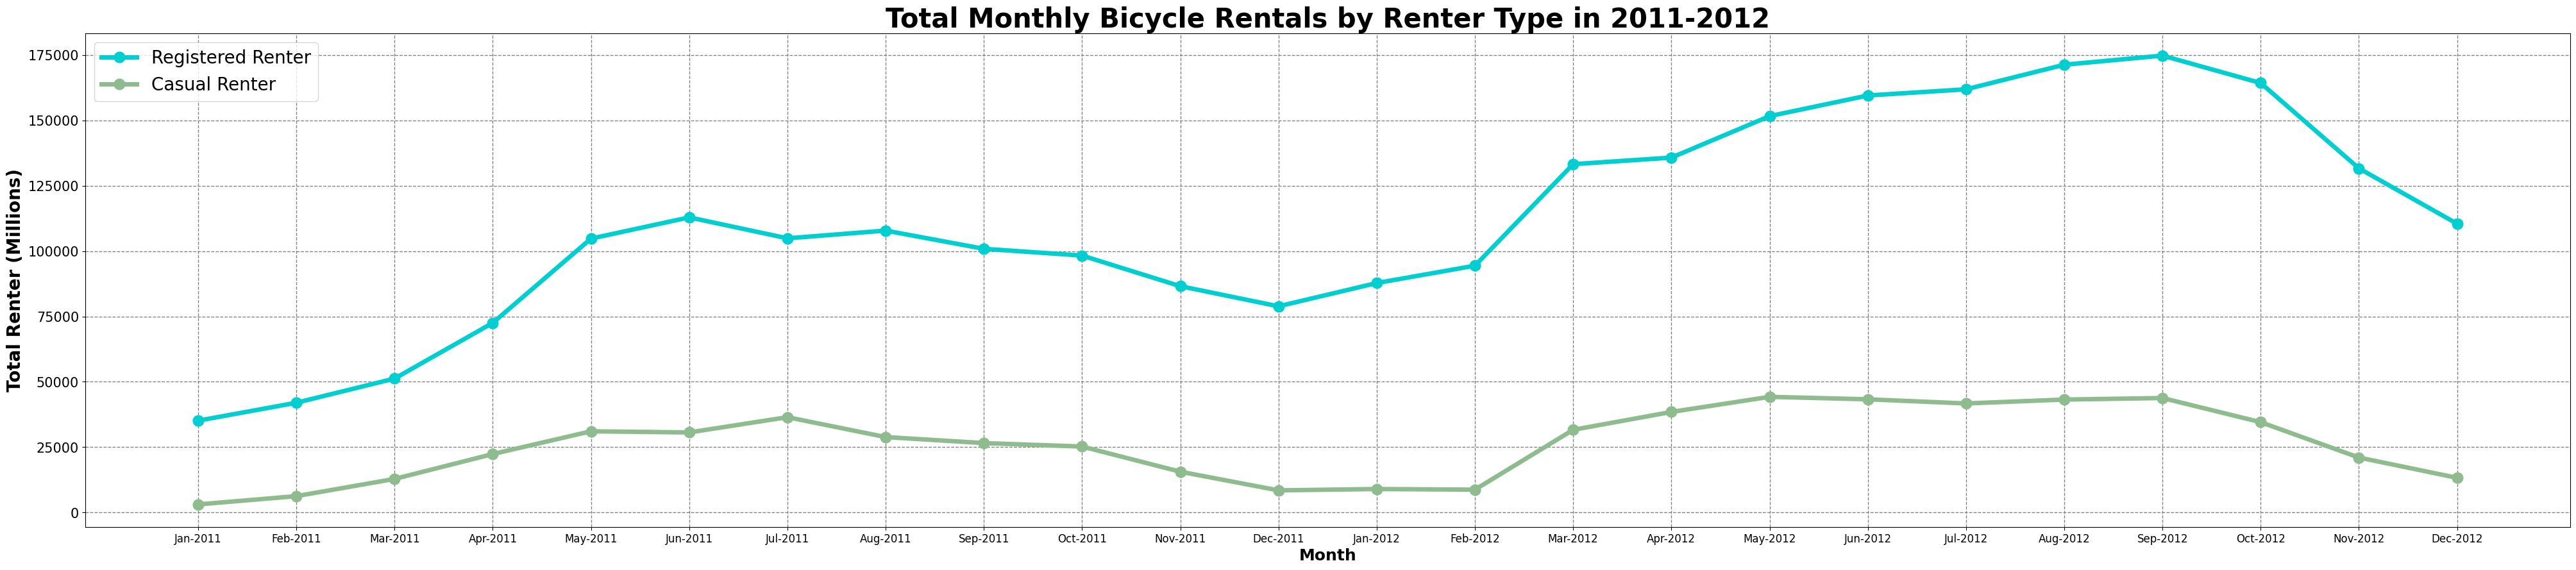

In [ ]:
monthly_df = days_df.resample(rule='M', on="dteday").agg({
    "registered": "sum",
    "casual": "sum",
})
monthly_df.index = monthly_df.index.strftime('%b-%Y')
monthly_df = monthly_df.reset_index()

x = monthly_df["dteday"]
y1 = monthly_df["registered"]
y2 = monthly_df["casual"]

plt.figure(figsize=(50,10), facecolor='white')
plt.title("Total Monthly Bicycle Rentals by Renter Type in 2011-2012", loc='center', fontsize=30, fontweight='bold')
plt.plot(monthly_df['dteday'], monthly_df['registered'],
         color = "#00CED1",
         linewidth=5,
         label="Registered Renter",
         marker='o',
         markersize=12)
plt.plot(monthly_df['dteday'], monthly_df['casual'],
         color = "#8FBC8F",
         linewidth=5,
         label="Casual Renter",
         marker='o',
         markersize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Month", loc='center', fontsize=18, fontweight='bold')
plt.ylabel("Total Renter (Millions)", loc='center', fontsize=20, fontweight='bold')
plt.legend(loc='upper left', fontsize=20)
plt.grid(color='grey', linestyle='--', linewidth=0.95)
plt.show()

## Conclusion

- Conclution pertanyaan 1

Hasil dari syntax tersebut adalah sebagai berikut. Dapat terlihat bahwasannya total penyewa yang terdaftar (Registered) selalu di atas penyewa yang umum (Casual). Dan dari visualisasi data tersebut, kita juga dapat mengetahui bahwasannya penyewaan tertinggi terjadi pada bulan september 2012 untuk tiap-tiap tipe penyewa dan penyewaan terendah terjadi pada bulan januari 2011. Lanjut ke visualisasi data pertanyaan kedua.

### Pertanyaan 2:

2.     Berapa total penyewa sepeda (cnt) pada setiap musimnya (season)?

Untuk menjawab pertanyaan nomor 2 ini, saya memilih untuk membuat visualisasi data menggunakan bar chart. Adapun syntax yang saya gunakan adalah sebagai berikut.

Text(0.5, 0.98, 'Total Bicycle Rentals per Season by Renter Type in 2011-2012')

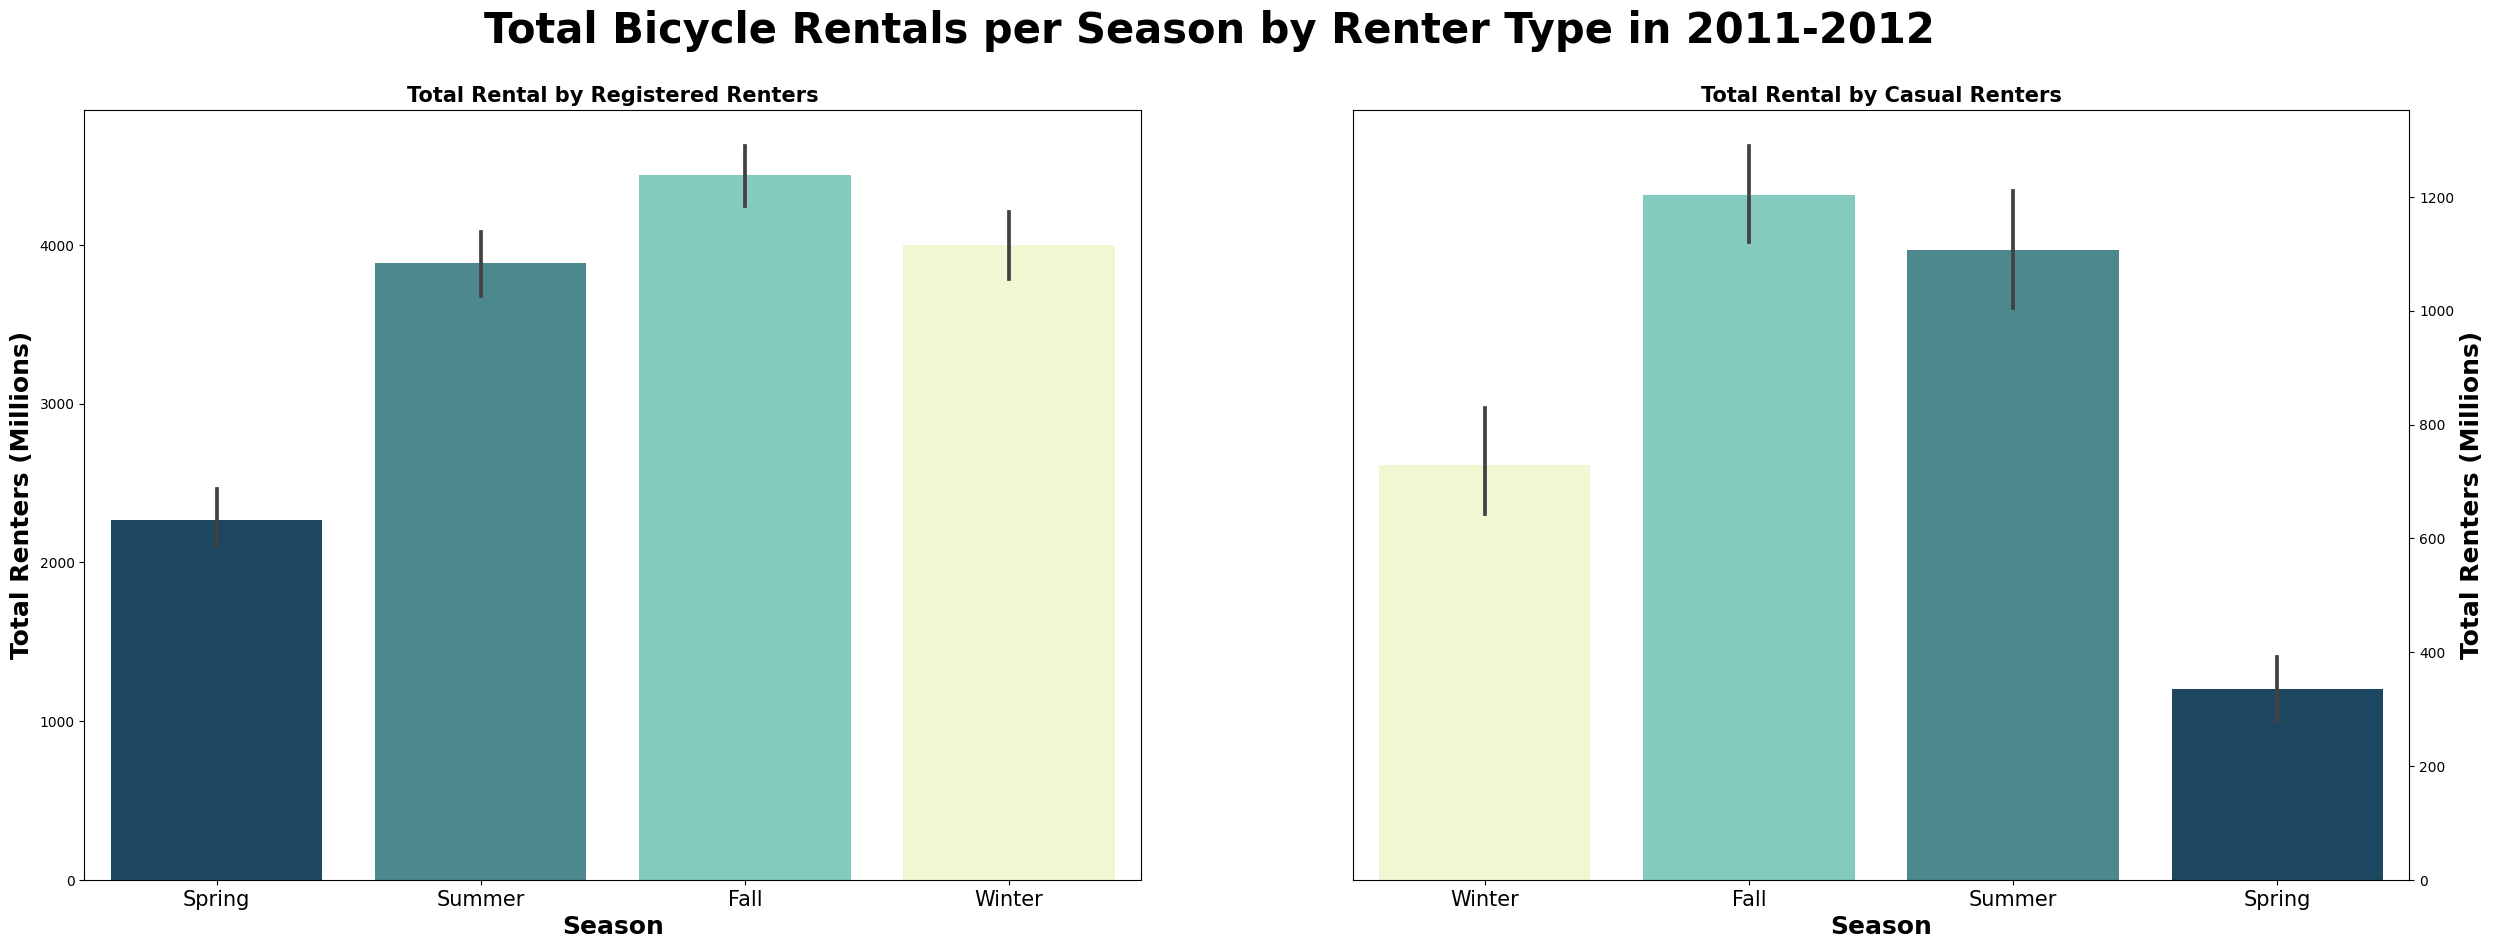

In [ ]:
days_df['season']
days_df['new_season'] = days_df['season'].replace({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
days_df['new_season']

days_df.groupby(by='new_season').agg({
    'registered': 'sum',
    'casual': 'sum',
    'cnt': 'sum',
})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

colors = ["#12486B", "#419197", "#78D6C6", "#F5FCCD"]

sns.barplot(x=days_df['new_season'], y=days_df['registered'], data=days_df['cnt'], palette=colors, ax=ax[0])
ax[0].set_ylabel('Total Renters (Millions)', fontsize=18, fontweight='bold')
ax[0].set_xlabel('Season', fontsize=18, fontweight='bold')
ax[0].set_title("Total Rental by Registered Renters", loc='center', fontsize=15, fontweight='bold')
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(x=days_df['new_season'], y=days_df['casual'], data=days_df['cnt'], palette=colors, ax=ax[1])
ax[1].set_ylabel('Total Renters (Millions)', fontsize=18, fontweight='bold')
ax[1].set_xlabel('Season', fontsize=18, fontweight='bold')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Total Rental by Casual Renters", loc='center', fontsize=15, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Total Bicycle Rentals per Season by Renter Type in 2011-2012", fontsize=30, fontweight='bold')

- Conclution pertanyaan 2

Dari visualisasi data di atas, kita dapat mengetahui bahwasanya musim yang paling banyak terjadi penyewaan adalah pada musim gugur (Fall) untuk setiap tipe penyewaan.

### Pertanyaan 3:

3.     Seberapa besarkan perbedaan antara penyewaan sepeda di hari kerja dan selain di hari kerja (workingday)?

Visualisasi data yang saya pilih untuk menjawab pertanyaan nomor 3 ini adalah bar chart. Berikut adalah syntax yang saya gunakan untuk membuat bar chart.

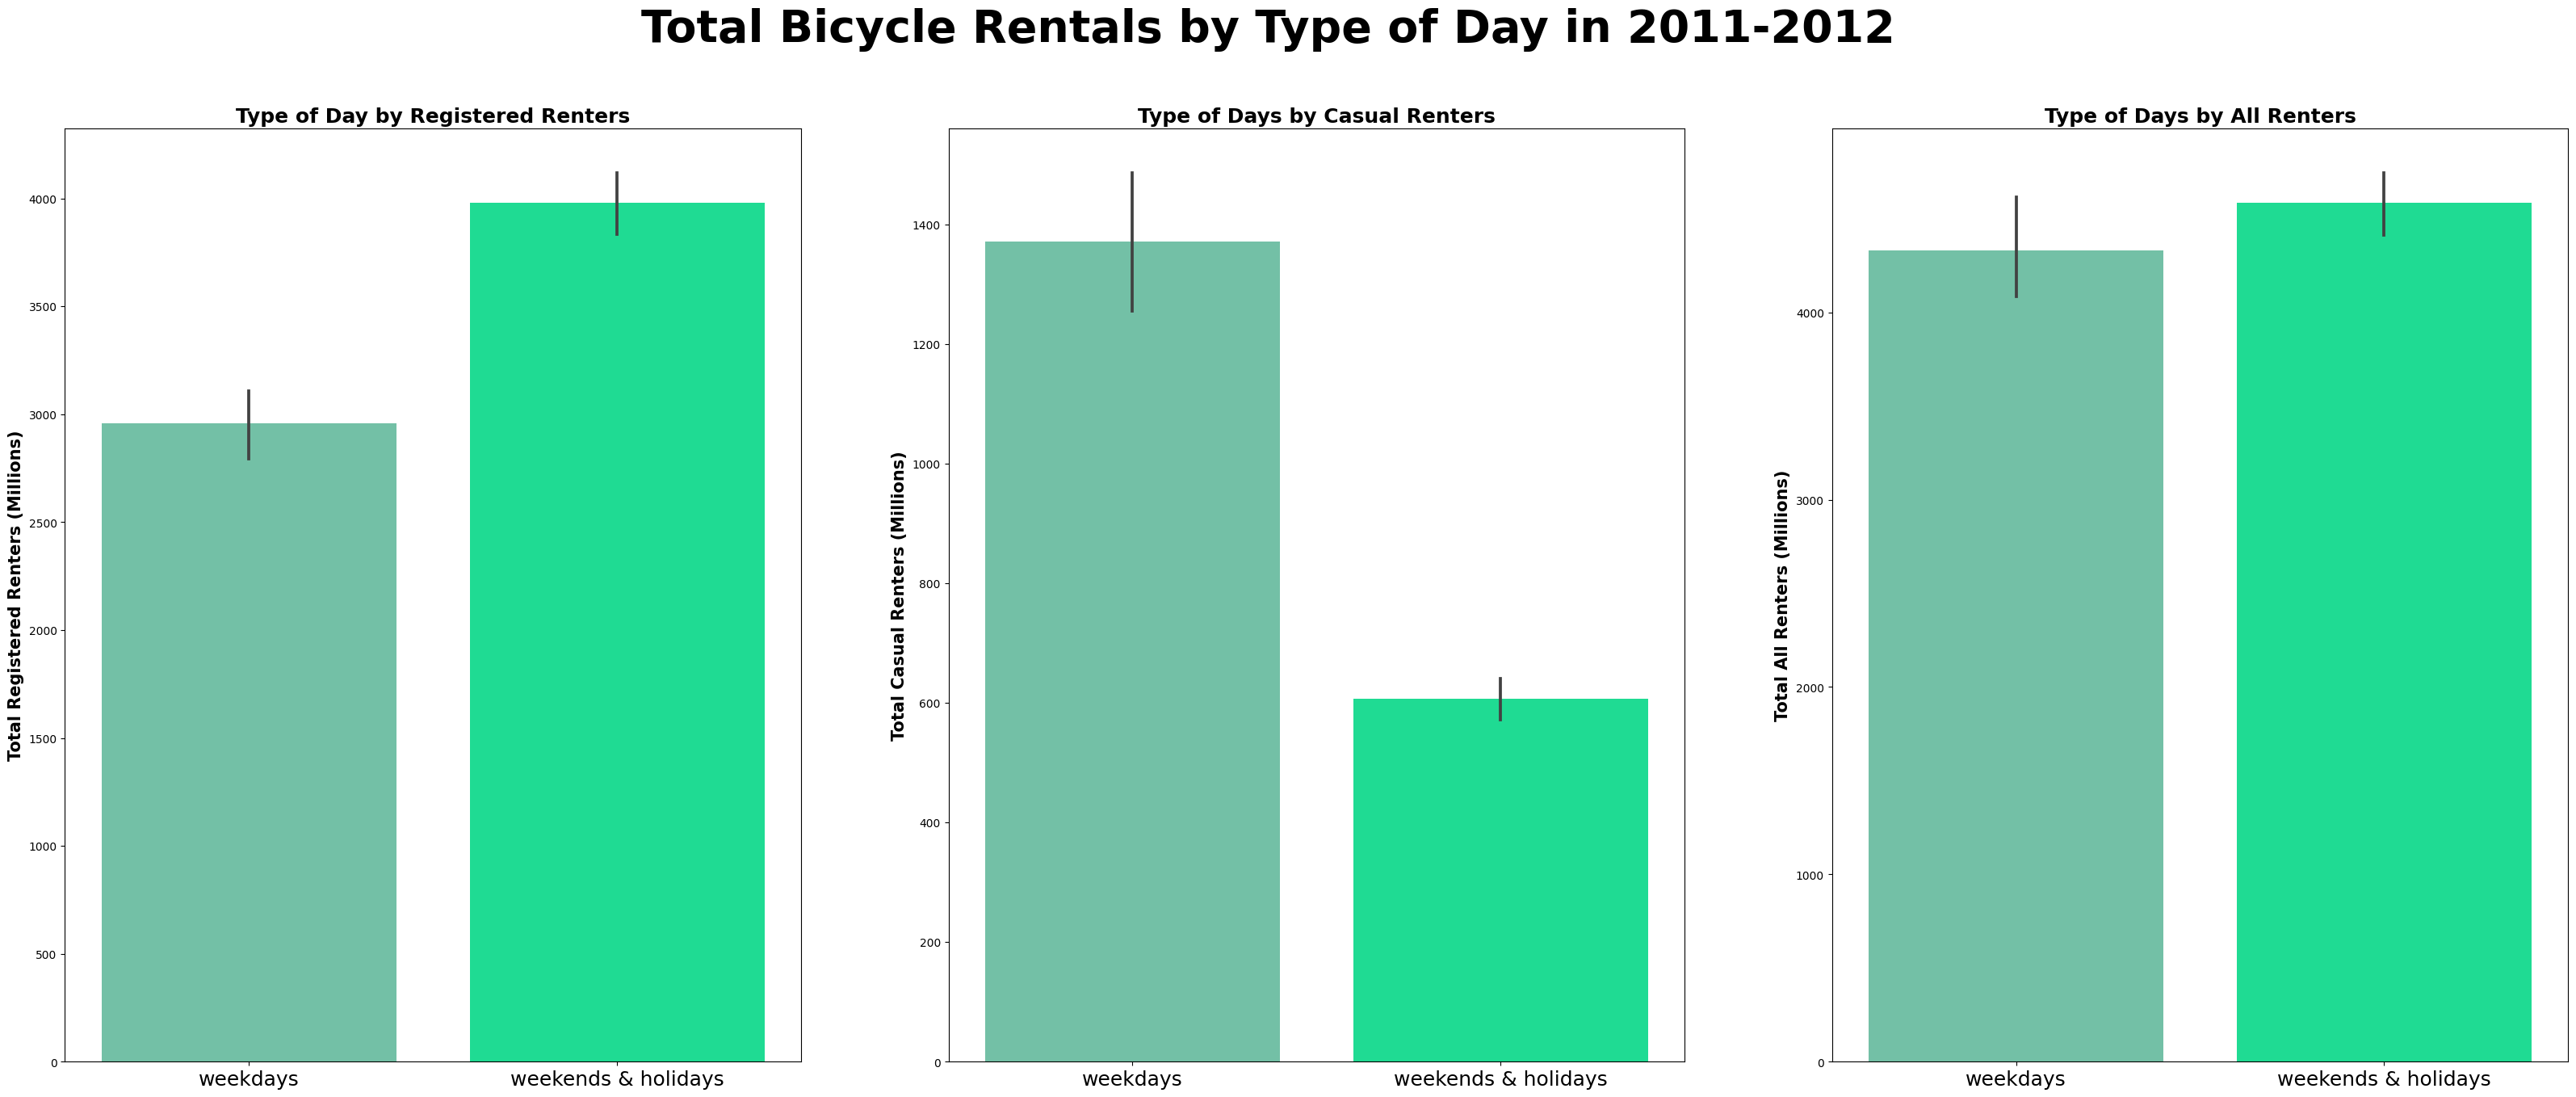

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40,15))

colors = ["#66CDAA", "#00FA9A"]

sns.barplot(y=days_df['registered'], x=days_df['new_workingday'], data=days_df['cnt'], palette=colors, ax=ax[0])
ax[0].set_ylabel('Total Registered Renters (Millions)', fontsize=15, fontweight='bold')
ax[0].set_xlabel(None)
ax[0].set_title("Type of Day by Registered Renters", loc='center', fontsize=18, fontweight='bold')
ax[0].tick_params(axis='x', labelsize=18)

sns.barplot(y=days_df['casual'], x=days_df['new_workingday'], data=days_df['cnt'], palette=colors, ax=ax[1])
ax[1].set_ylabel('Total Casual Renters (Millions)', fontsize=15, fontweight='bold')
ax[1].set_xlabel(None)
ax[1].set_title("Type of Days by Casual Renters", loc='center', fontsize=18, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=18)

sns.barplot(y=days_df['cnt'], x=days_df['new_workingday'], data=days_df, palette=colors, ax=ax[2])
ax[2].set_ylabel('Total All Renters (Millions)', fontsize=15, fontweight='bold')
ax[2].set_xlabel(None)
ax[2].set_title("Type of Days by All Renters", loc='center', fontsize=18, fontweight='bold')
ax[2].tick_params(axis='x', labelsize=18)

plt.suptitle("Total Bicycle Rentals by Type of Day in 2011-2012 ", fontsize=40, fontweight='bold')
plt.show()

- Conclution pertanyaan 3

Dari visualisasi data di atas, kita dapat mengetahui bahwasanya jenis hari berpengaruh terhadap penyewaan sepeda. Pada weekdays, penyewa yang umum (Casual) lebih banyak melakukan penyewaan dibandingkan penyewa yang terdaftar (Registered) dan sebaliknya ketika hari libur (weekends & holidays), penyewa yang terdaftar (Registered) lebih banyak dibandingkan penyewa yang umum (Casual). Hal ini mungkin bisa terjadi karena kebanyakan penyewa yang terdaftar (Registered) merupakan pekerja yang dimana mereka hanya dapat melakuka penyewaan sepeda di hari-hari libur.

### Pertanyaan 4:

4.    Bagaimana persebaran dari penyewaan sepeda di setiap jamnya?(hr) Apakah memiliki pengaruh?


Untuk menjawab pertanyaan nomor 4 ini, saya memilih untuk membuat tabel. Hal ini karena saya beranggapan bahwasanya visualisasi data dalam bentuk tabel dapat lebih memudahkan pembaca untuk memahami hal tersebut karena dapat langsung memasangkan filter pada tabel tersebut.

In [ ]:
table_hours_df = hours_df.groupby(by='hr').agg({
    "registered": "sum",
    "casual": "sum",
    "cnt": "sum",
})

table_hours_df

,registered,casual,cnt
hr,,,
0,31755,7375,39130
1,19455,4709,24164
2,12940,3412,16352
3,6281,1893,8174
4,3554,874,4428
5,13249,1012,14261
6,52115,3017,55132
7,146134,8037,154171
8,245240,15761,261001


- Conclution pertanyaan 4

Pada tabel di atas, dapat diketahui bahwasanya jam juga berpengaruh terhadap penyewaan sepeda. Hal ini dapat dilihat bahwa penyewaan terendah terjadi pada jam 00.00 hingga 06.00. Hal tersebut juga terjadi pada setiap tipe penyewa baik penyewa yang terdaftar (Registered) ataupun penyewa yang umum (Casual)

Itu hasil analisa saya dari dataset days dan hours tentang penyewaan sepeda. Semoga hal tersebut dapat membantu untuk memberikan gambaran hal apa yang harus diperbaiki lagi agar perusahaan dapat meraih keuntungan lebih baik lagi. Terima Kasih banyak atas perhatiannya, Saya Rayhan Ananda Resky pamit Undur Diri.

Wassalamualaikum Warahmatullahi Wabarakatuh.